<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/EDA_Tarea_3_Analitica_i_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidencia de Aprendizaje 3: Taller Análisis Exploratorio de Datos
----------------------


## Objetivo


- Aplicar tecnicas estadisticas en la exploracion de datos


-------------------
- Name :Juan Felipe Cardona Arango
- id: 1035428859
- Course: Analitica I
- Asesor: Jaime Andres Gutierrez Monsalve
- Date: 03/06/2023


[Acceso al Dashborad Aqui](https://public.tableau.com/app/profile/juan.felipe116/viz/IU_digital_Analitica_I/Dashboard1?publish=yes)



In [1]:
# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

%matplotlib inline
#from mpl_toolkits.mplot3d import Axes3D
#plt.rcParams['figure.figsize'] = (16, 9)
#plt.style.use('ggplot')
# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)


# Extracción de datos del CSV

In [3]:
import pandas as pd

url = 'https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'

# Leer el archivo de texto en un DataFrame
df = pd.read_csv(url, sep='\t')

# Mostrar el DataFrame
print(df)

     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]


In [4]:
df.to_csv('raw_data.csv', index=False)

# Preprocesamiento de datos

In [5]:
colnames=df.columns.values
print(colnames)

['AGE' 'SEX' 'BMI' 'BP' 'S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'Y']


In [34]:
df.rename(columns={'AGE':"EDAD",'SEX':"GENERO", 'BMI':"IMC", 'BP':"BPI" ,'S1':"TC",'S2':"LDL",'S3':"HDL",'S4':"TCH",'S5':"LTG",'S6':"GLU",'Y':"R"}, inplace=True )

In [45]:
colnames=df.columns.values
print(colnames)

['EDAD' 'GENERO' 'IMC' 'BPI' 'TC' 'LDL' 'HDL' 'TCH' 'LTG' 'GLU' 'R']


In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df.head(5)

,EDAD,GENERO,IMC,BPI,TC,LDL,HDL,TCH,LTG,GLU,R
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EDAD    442 non-null    int64  
 1   GENERO  442 non-null    int64  
 2   IMC     442 non-null    float64
 3   BPI     442 non-null    float64
 4   TC      442 non-null    int64  
 5   LDL     442 non-null    float64
 6   HDL     442 non-null    float64
 7   TCH     442 non-null    float64
 8   LTG     442 non-null    float64
 9   GLU     442 non-null    int64  
 10  R       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


Se revisa el tipo de dato , en este caso no hay que realizar imputacion de datos, todos son numericos

In [38]:
df.isnull().sum()

EDAD      0
GENERO    0
IMC       0
BPI       0
TC        0
LDL       0
HDL       0
TCH       0
LTG       0
GLU       0
R         0
dtype: int64

Se busca la existencia de datos faltantes, no se encontraton.

# Analisis Descriptivo

## Analisis Univariado

In [39]:
df.describe()

,EDAD,GENERO,IMC,BPI,TC,LDL,HDL,TCH,LTG,GLU,R
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


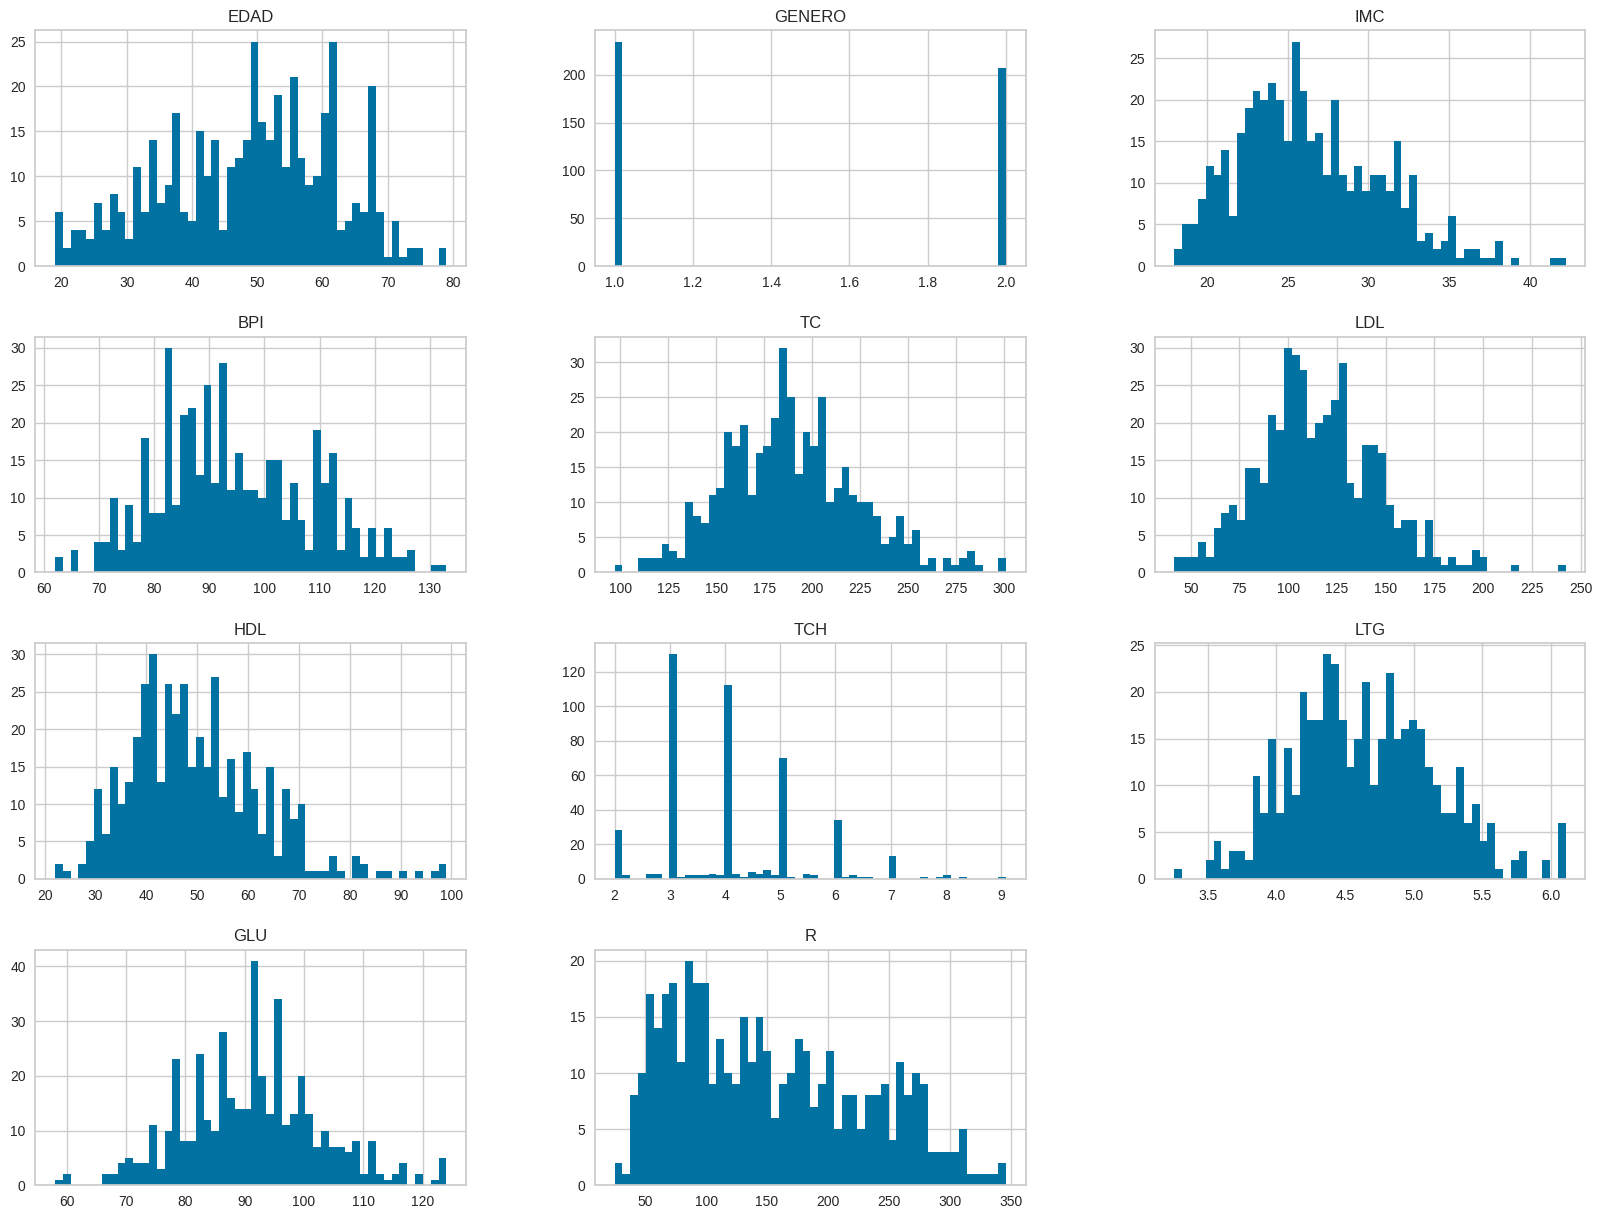

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

El histograma de frecuencias permite exponer la dritbucion de los datos, observa que la mayoti presenta una dsitrbucion guassiana

### Edad

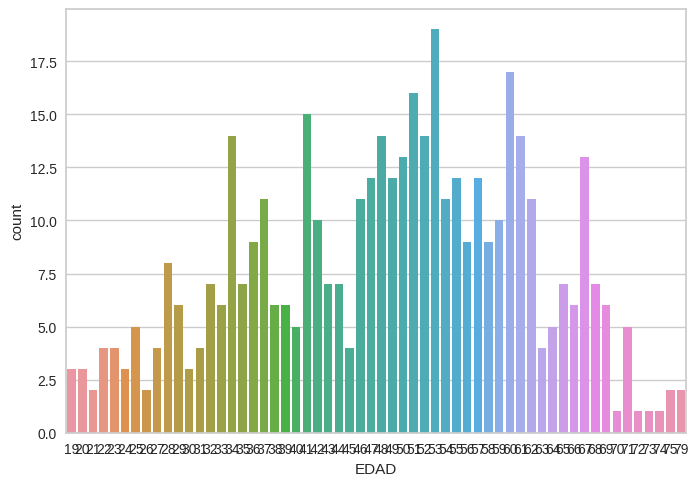

In [42]:
  sns.countplot(data = df , x = "EDAD")
  rcParams['figure.figsize'] = 20,8.27




el histograma permite  exponer la distriucion de los pacientes segun su edad, se puede observar que existe una mayor densidad de los mismos entre los 46 a 60 años


### Sexo

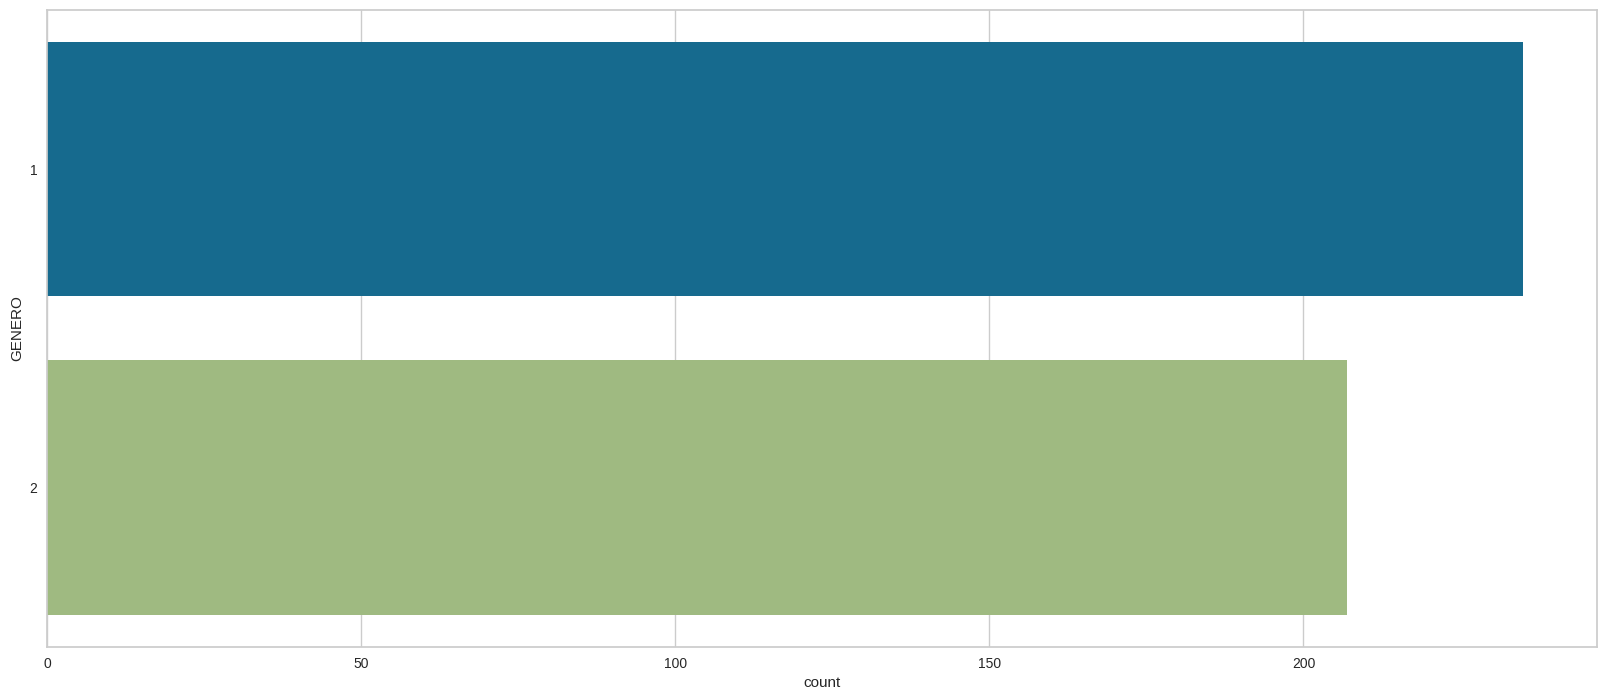

In [43]:
  sns.countplot(data = df , y = "GENERO")
  rcParams['figure.figsize'] = 11.7,8.27


el historgrama permite exponer la cantidad de participantes segun el sexo

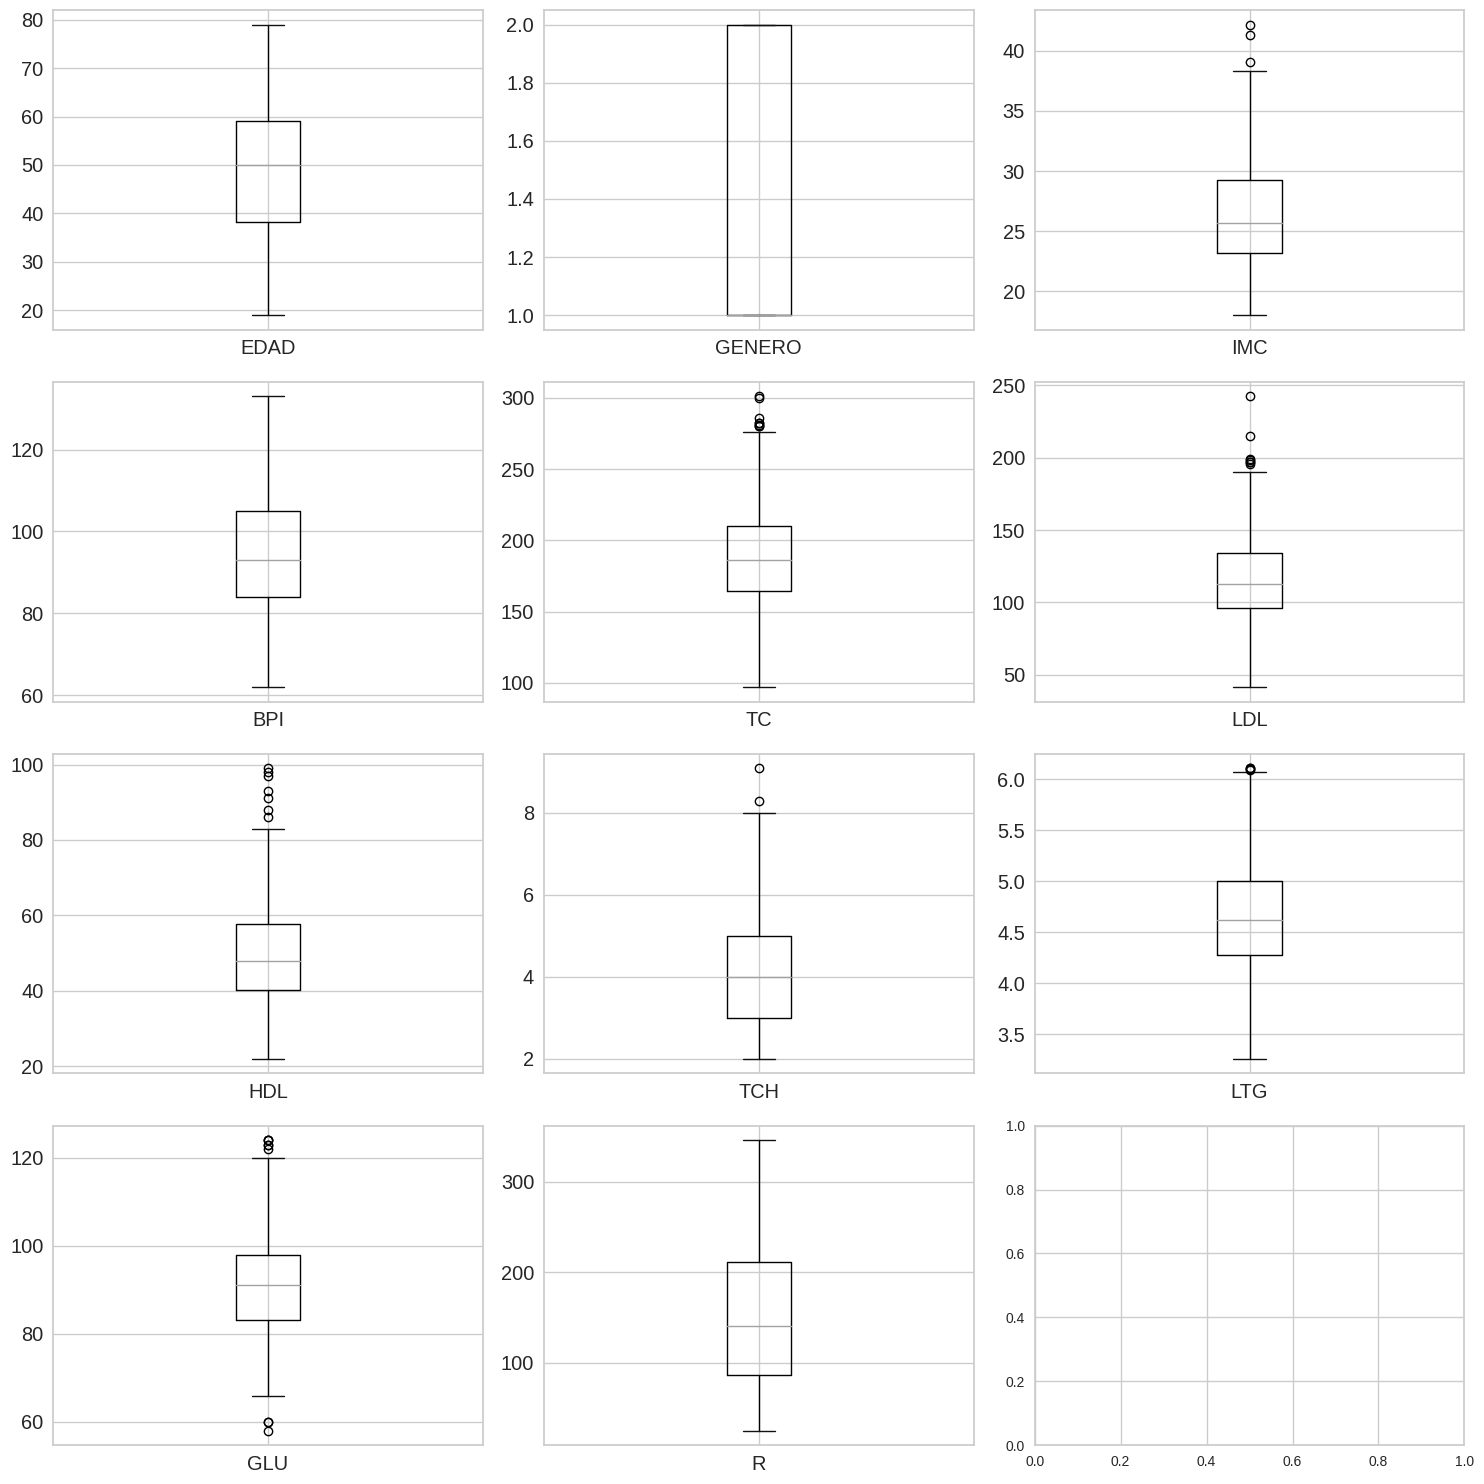

In [46]:
fig, axes = plt.subplots(4,3) # create figure and axes

for i, el in enumerate(list(df[colnames].columns.values)):
  a = df.boxplot(el, ax=axes.flatten()[i], fontsize='large')

fig.set_size_inches(15, 15)
plt.tight_layout()

plt.show()

la exploracion de datos permite exponer a traves del box plot la media,los datos anomalos , el primer , segundo y tercer cuartil asi como su rango

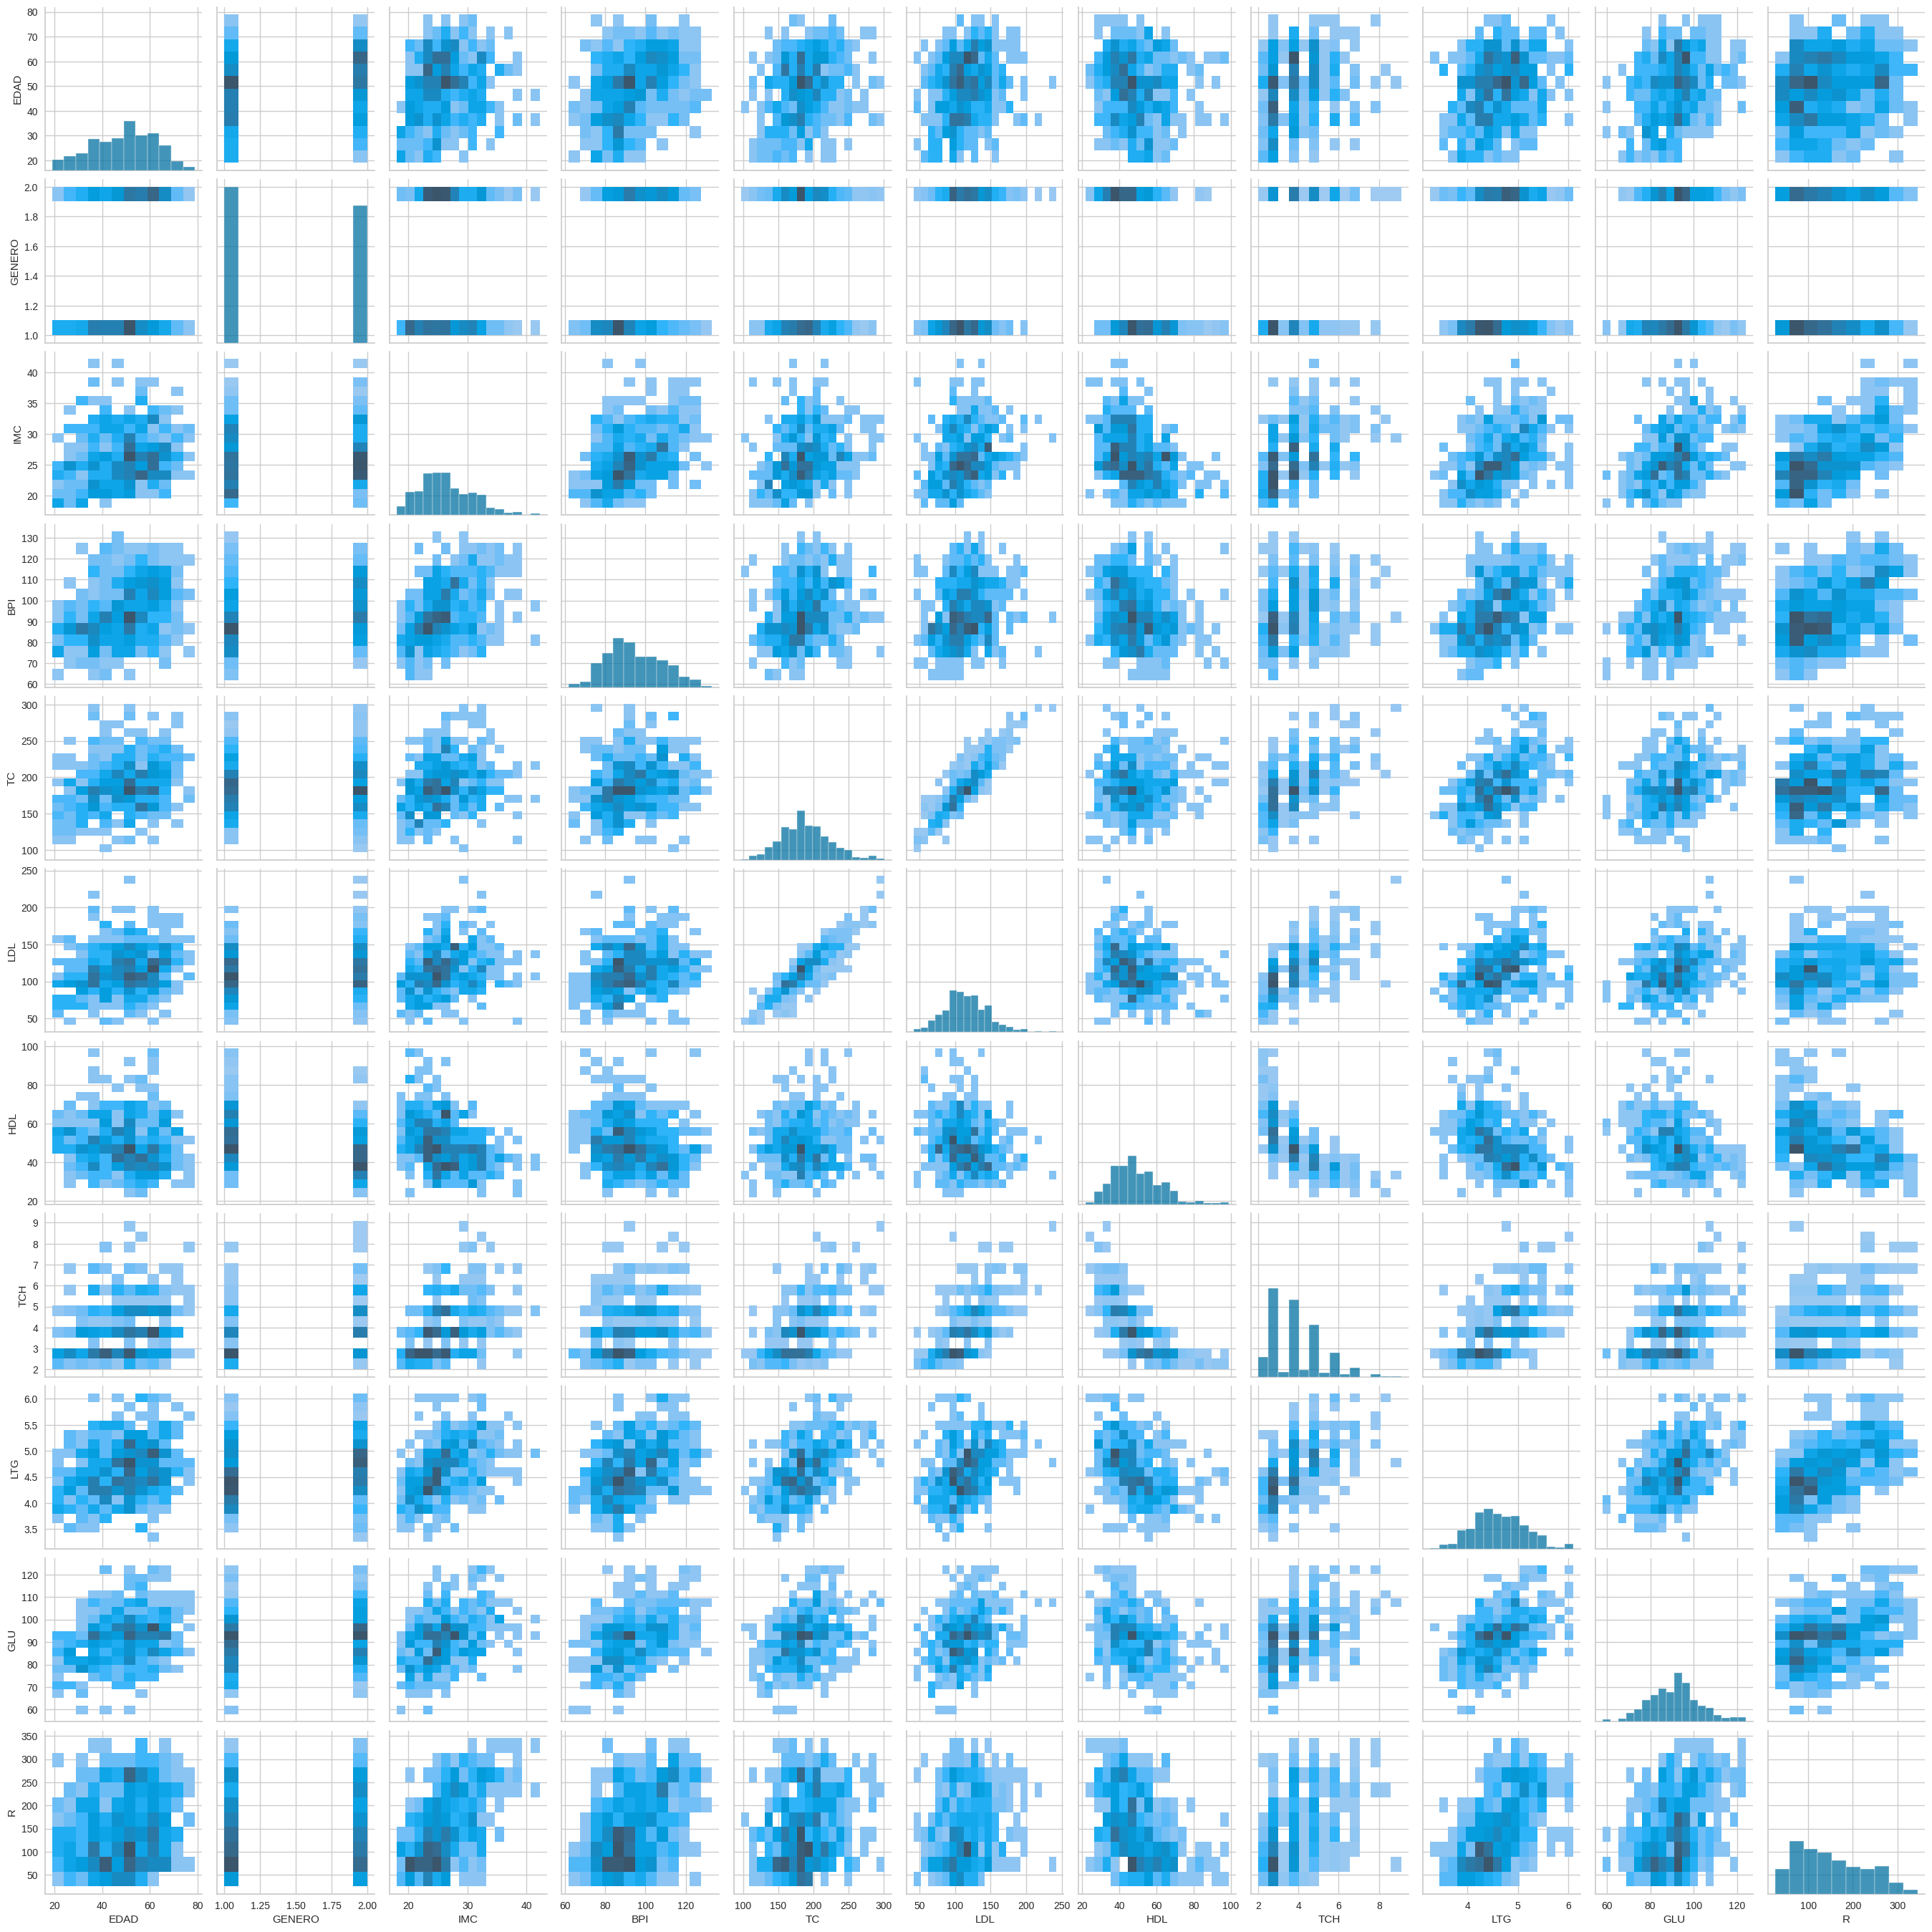

In [47]:
sns.pairplot(df,kind="hist")

la exploracion de datos en el pair grid permite ver la densidad " intensidad del color" segun la distibucion de los datos


## Analisis Bivariado

<Axes: xlabel='EDAD'>

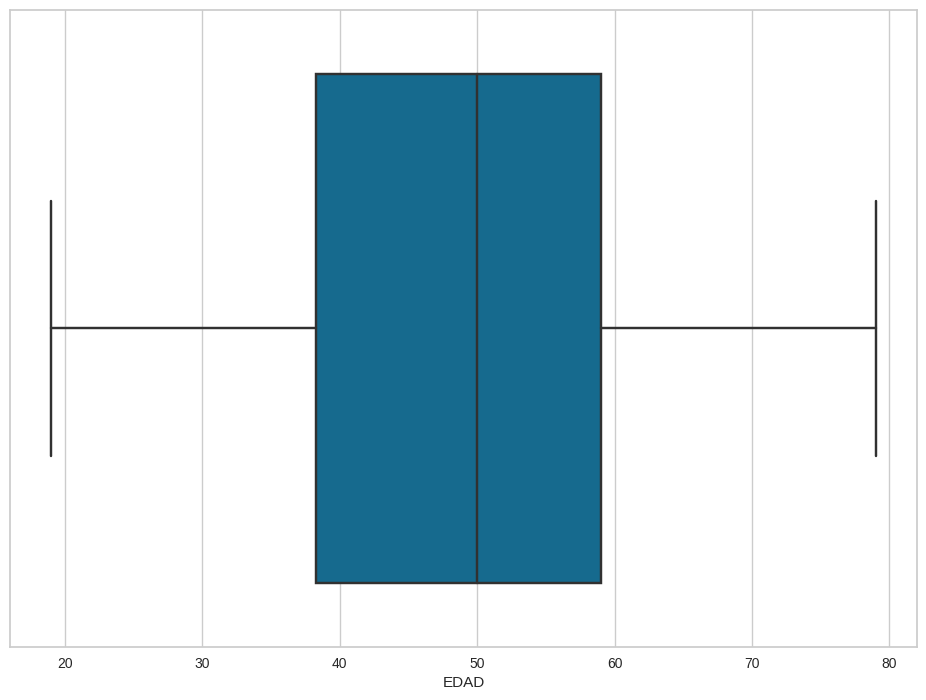

In [48]:
sns.boxplot(data=df , x="EDAD", hue="GENERO")

<Axes: xlabel='EDAD', ylabel='IMC'>

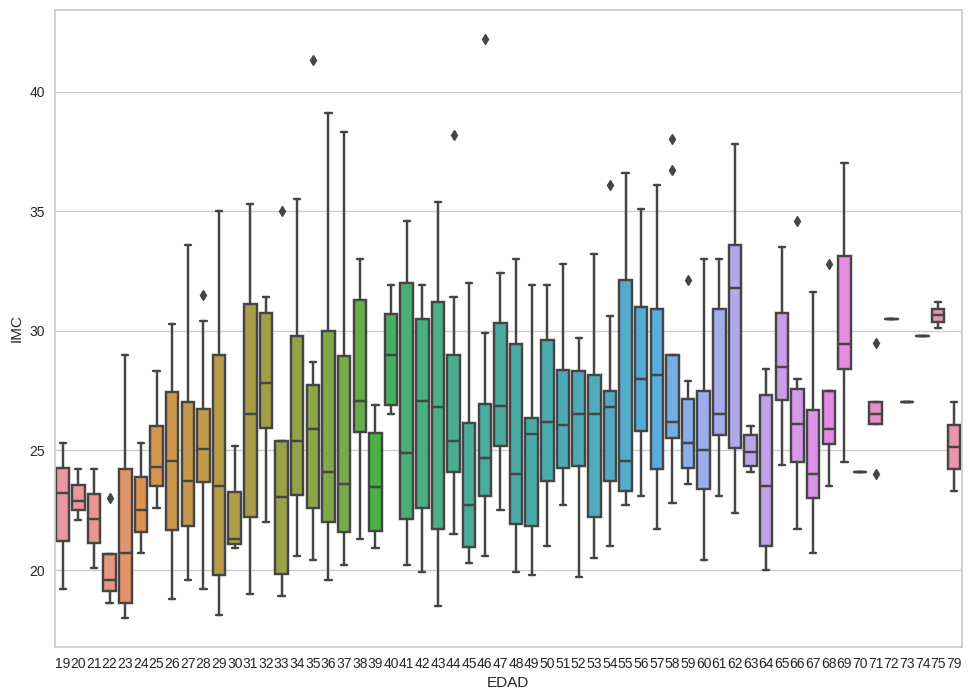

In [49]:
sns.boxplot(data=df , x="EDAD", y="IMC")

<Axes: xlabel='GENERO', ylabel='LDL'>

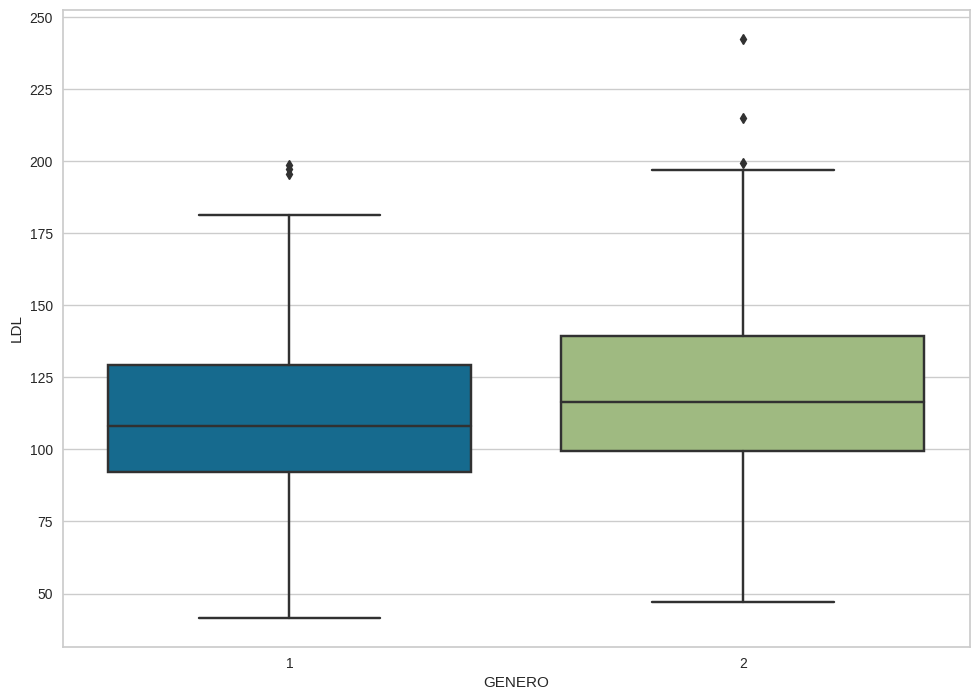

In [50]:
sns.boxplot(data=df , x="GENERO", y="LDL")

### Correlaciones (Corr)

A continuación se explorará en qué medida dos variables están relacionadas linealmente (correlación).

El objetivo de este ejercicio es describir relaciones sencillas sin hacer afirmaciones sobre causa y efecto y observar el grado de intensidad con el que están relacionadas.

In [51]:
df.corr(method='spearman')

,EDAD,GENERO,IMC,BPI,TC,LDL,HDL,TCH,LTG,GLU,R
EDAD,1.000000,0.177463,0.200554,0.350859,0.262524,0.221711,-0.106973,0.221017,0.265176,0.296235,0.197822
GENERO,0.177463,1.000000,0.098079,0.261508,0.027790,0.134695,-0.394584,0.337524,0.174625,0.203277,0.037401
IMC,0.200554,0.098079,1.000000,0.397985,0.287829,0.295494,-0.371172,0.459068,0.491609,0.384664,0.561382
BPI,0.350859,0.261508,0.397985,1.000000,0.275224,0.205638,-0.191033,0.280799,0.396071,0.381219,0.416241
TC,0.262524,0.027790,0.287829,0.275224,1.000000,0.878793,0.015308,0.520674,0.512864,0.332173,0.232429
LDL,0.221711,0.134695,0.295494,0.205638,0.878793,1.000000,-0.197435,0.652283,0.349947,0.286483,0.195834
HDL,-0.106973,-0.394584,-0.371172,-0.191033,0.015308,-0.197435,1.000000,-0.789694,-0.450420,-0.290863,-0.410022
TCH,0.221017,0.337524,0.459068,0.280799,0.520674,0.652283,-0.789694,1.000000,0.640390,0.413700,0.448931
LTG,0.265176,0.174625,0.491609,0.396071,0.512864,0.349947,-0.450420,0.640390,1.000000,0.453023,0.589416
GLU,0.296235,0.203277,0.384664,0.381219,0.332173,0.286483,-0.290863,0.413700,0.453023,1.000000,0.350792


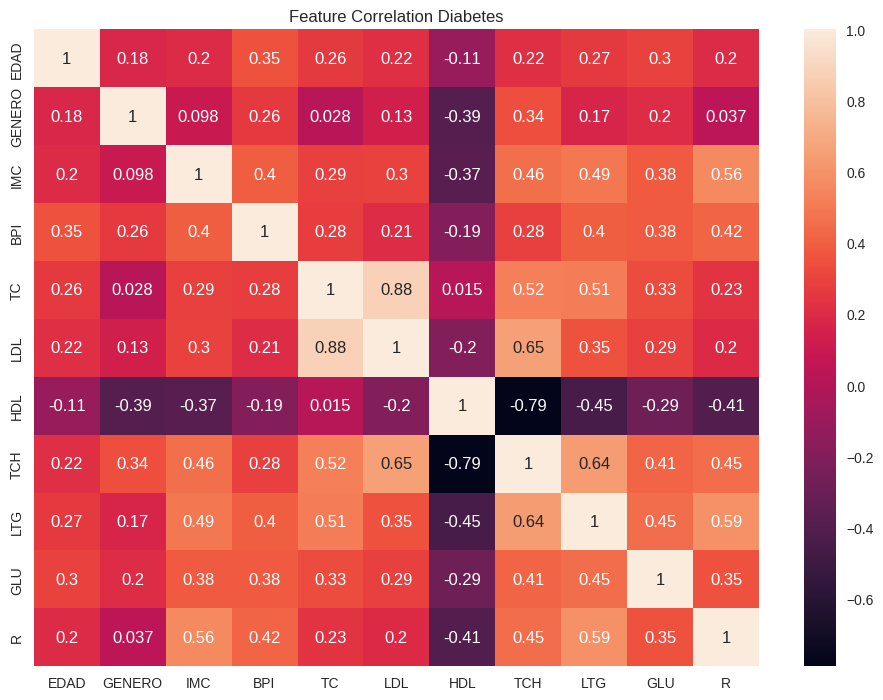

In [52]:
sns.heatmap(df.corr(method='spearman'),annot=True )
plt.title('Feature Correlation Diabetes')
plt.show()

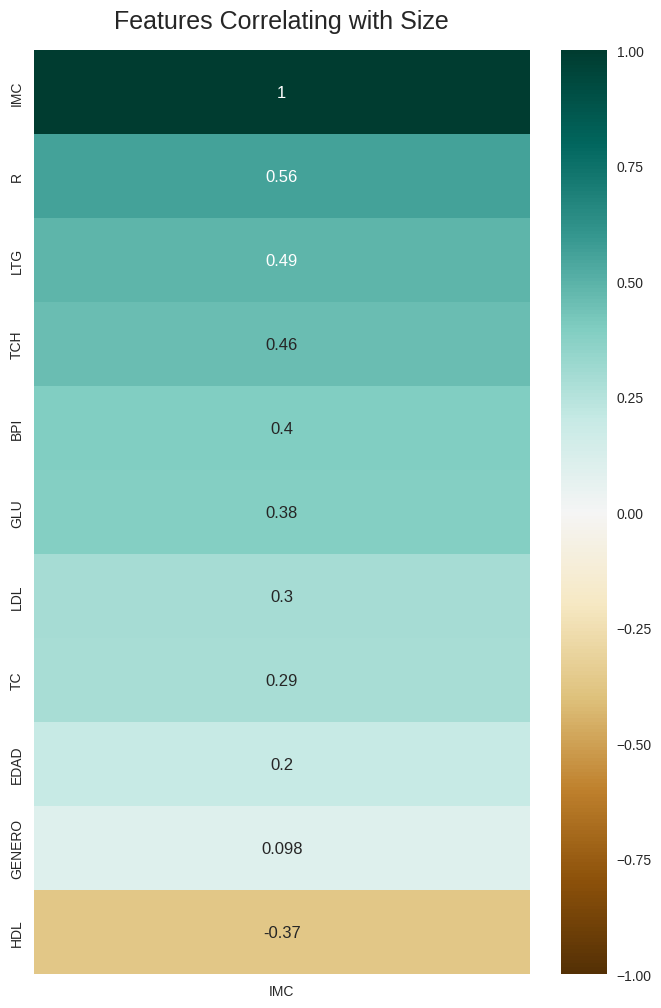

In [53]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr(method='spearman')[['IMC']].sort_values(by='IMC', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Size', fontdict={'fontsize':18}, pad=16);

Con la correlacion puedo observar el grado de fuerza entre el atributo de gravedad_muerto con las demas atributos, se puede observar que algunos atrbutos de longitud geoespecial tiene mayor grado de fuerza.

# Modelacion con Ml

In [54]:
! pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Setup

In [55]:
from pycaret.regression import*
s=setup(df,target="R", session_id=123)

,Description,Value
0,Session id,123
1,Target,R
2,Target type,Regression
3,Original data shape,"(442, 11)"
4,Transformed data shape,"(442, 11)"
5,Transformed train set shape,"(309, 11)"
6,Transformed test set shape,"(133, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


## Comparara Modelos

In [56]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,44.6842,3078.0057,55.2482,0.4558,0.4250,0.4002,0.0650
lr,Linear Regression,44.6491,3077.7073,55.2308,0.4555,0.4267,0.4002,0.2690
lar,Least Angle Regression,44.6542,3078.1945,55.2350,0.4555,0.4269,0.4004,0.0350
lasso,Lasso Regression,45.2547,3129.2043,55.7750,0.4483,0.4256,0.4046,0.0360
llar,Lasso Least Angle Regression,45.2549,3129.2362,55.7753,0.4483,0.4256,0.4046,0.0350
en,Elastic Net,46.6460,3238.8447,56.7848,0.4310,0.4312,0.4155,0.0690
et,Extra Trees Regressor,46.4300,3251.0631,56.8112,0.4296,0.4325,0.4134,0.2290
br,Bayesian Ridge,46.9985,3279.0272,57.1352,0.4251,0.4334,0.4188,0.0370
huber,Huber Regressor,45.7986,3265.9149,56.8801,0.4228,0.4299,0.4059,0.0540
rf,Random Forest Regressor,46.8614,3316.6230,57.3425,0.4163,0.4331,0.4144,0.4280


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Analisis de modelo

### Plot residuals

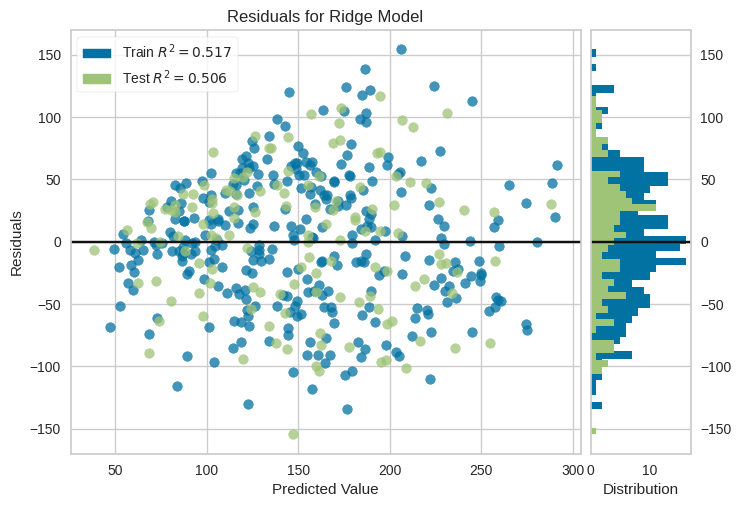

In [27]:
# plot residuals
plot_model(best, plot = 'residuals')

### Plot feature importance

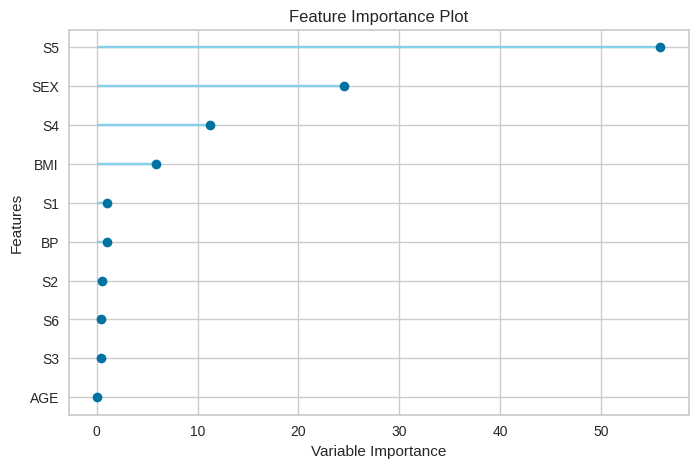

In [29]:
plot_model(best, plot = 'feature')

### Plot error

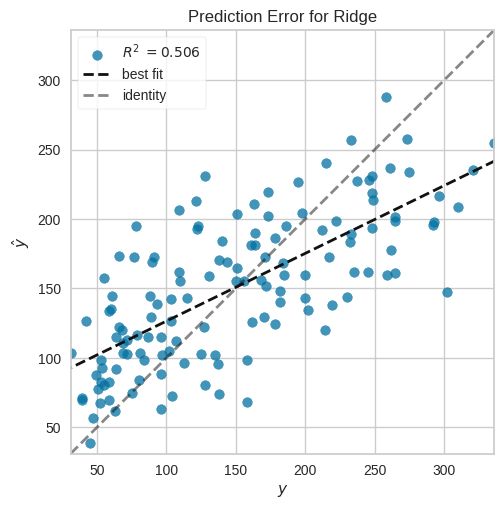

In [28]:
plot_model(best, plot = 'error')

## Prediccion

In [30]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,44.5381,2934.7256,54.1731,0.5065,0.4132,0.3984


In [31]:
holdout_pred.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,prediction_label
13,50,2,26.200001,97.0,186,105.400002,49.0,4.00,5.0626,88,185,159.511910
66,46,2,24.700001,85.0,174,123.199997,30.0,6.00,4.6444,96,150,155.286344
234,61,1,30.000000,108.0,194,100.000000,52.0,3.73,5.3471,105,246,228.077132
24,31,1,29.700001,88.0,167,103.400002,48.0,4.00,4.3567,78,184,168.107351
388,63,2,24.100000,111.0,184,112.199997,44.0,4.00,4.9345,82,110,155.180619


## Guardar Modelo.

In [32]:
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['AGE', 'SEX', 'BMI', 'BP', 'S1',
                                              'S2', 'S3', 'S4', 'S5', 'S6'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', Ridge(random_state=123))]),
 'my_first_pipeline.pkl')

In [33]:
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['AGE', 'SEX', 'BMI', 'BP', 'S1',
                                             'S2', 'S3', 'S4', 'S5', 'S6'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', Ridge(random_state=123))])